In [1]:
import geoplot as gplt
import pandas as pd
import geopandas as gpd
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [66]:
from shapely.geometry import Point

collisions = pd.read_csv("https://github.com/ResidentMario/geoplot-data-old/raw/master/nyc_collisions/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)
collisions = collisions[collisions['BOROUGH'].notnull()]

fatal_collisions = collisions[collisions["NUMBER OF PERSONS KILLED"] > 0]

def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return Point(0, 0)
    else:
        return Point(long, lat)

fatal_collisions = gpd.GeoDataFrame(fatal_collisions,
                                    geometry=fatal_collisions.apply(pointify, axis='columns'))
fatal_collisions = fatal_collisions[fatal_collisions.geometry.map(lambda srs: not (srs.x == 0))]
fatal_collisions = fatal_collisions[fatal_collisions['DATE'].map(lambda day: "2016" in day)]

fatal_collisons_geojson = fatal_collisions.loc[:, ['BOROUGH', 'NUMBER OF PERSONS KILLED', 'geometry']].to_json()

with open("nyc-fatal-traffic-collisions.geojson", "w") as f:
    f.write(fatal_collisons_geojson)

    
injurious_collisions = collisions[collisions["NUMBER OF PERSONS INJURED"] > 0]
injurious_collisions = gpd.GeoDataFrame(injurious_collisions,
                                        geometry=injurious_collisions.apply(pointify, axis='columns'))
injurious_collisions = injurious_collisions[injurious_collisions.geometry.map(lambda srs: not (srs.x == 0))]
injurious_collisions = injurious_collisions[injurious_collisions['DATE'].map(lambda day: "2016" in day)]
injurious_collisions_geojson = injurious_collisions.loc[:, ['BOROUGH', 'NUMBER OF PERSONS INJURED', 'geometry']].to_json()

with open("nyc-injurious-traffic-collisions.geojson", "w") as f:
    f.write(injurious_collisions_geojson)

In [112]:
len(fatal_collisions)

72

In [111]:
len(injurious_collisions)

20644

In [107]:
injurious_collisions = collisions[collisions["NUMBER OF PERSONS INJURED"] > 0]
injurious_collisions = gpd.GeoDataFrame(injurious_collisions,
                                        geometry=injurious_collisions.apply(pointify, axis='columns'))
injurious_collisions = injurious_collisions[injurious_collisions.geometry.map(lambda srs: not (srs.x == 0))]
injurious_collisions = injurious_collisions[injurious_collisions['DATE'].map(lambda day: "2016" in day)]
injurious_collisions_geojson = injurious_collisions.loc[:, ['BOROUGH', 'NUMBER OF PERSONS INJURED', 'geometry']].to_json()

with open("nyc-injurious-traffic-collisions.geojson", "w") as f:
    f.write(injurious_collisions_geojson)

In [39]:
with open("nyc-boroughs.geojson", "w") as f:
    f.write(requests.get("https://github.com/ResidentMario/geoplot-data/raw/master/nyc_boroughs/boroughs.geojson").text)

In [42]:
import matplotlib.pyplot as plt
import geoplot.crs as gcrs

boroughs = gpd.read_file("nyc-boroughs.geojson")

fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(121, projection=gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059))
gplt.polyplot(boroughs, ax=ax1, projection=gcrs.AlbersEqualArea())
gplt.pointplot(fatal_collisions, projection=gcrs.AlbersEqualArea(),
               hue='BOROUGH', categorical=True,
               edgecolor='white', linewidth=0.5, zorder=10,
               scale='NUMBER OF PERSONS KILLED', limits=(2, 8),
               legend=True, legend_var='scale', legend_kwargs={'loc': 'upper left'},
               legend_values=[2, 1], legend_labels=['2 Fatalities', '1 Fatality'],
               ax=ax1)
plt.title("Fatal Crashes in New York City, 2016")

ax2 = plt.subplot(122, projection=gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059))
gplt.polyplot(boroughs, ax=ax2, projection=gcrs.AlbersEqualArea())
gplt.pointplot(injurious_collisions, projection=gcrs.AlbersEqualArea(),
               hue='BOROUGH', categorical=True,
               edgecolor='white', linewidth=0.5, zorder=10,
               scale='NUMBER OF PERSONS INJURED', limits=(1, 10),
               legend=True, legend_var='scale', legend_kwargs={'loc': 'upper left'},
               legend_values=[20, 15, 10, 5, 1],
               legend_labels=['20 Injuries', '15 Injuries', '10 Injuries', '5 Injuries', '1 Injury'],
               ax=ax2)
plt.title("Injurious Crashes in New York City, 2016")

In [43]:
del fatal_collisions
del injurious_collisions

In [44]:
cities = gpd.read_file("/Users/Honors/Desktop/geoplot-data/cities/citiesx010g.shp")

In [53]:
with open("us-cities.geojson", "w") as f:
    f.write(cities.query('POP_2010 > 10000').loc[:, ['STATE', 'POP_2010', 'ELEV_IN_FT', 'geometry']].to_json())

In [60]:
usa = gpd.read_file("/Users/Honors/Desktop/geoplot-data/united_states/usa.geojson")
contiguous_usa = usa[~usa['adm1_code'].isin(['USA-3517', 'USA-3563'])]

In [64]:
with open("contiguous-usa.geojson", "w") as f:
    f.write(contiguous_usa.loc[:, ['adm1_code', 'geometry']].to_json())

In [67]:
census_2010 = gpd.read_file("/Users/Honors/Desktop/geoplot-data/ny_census_2010/cty036.shp")

In [72]:
with open("nyc-census-partial.geojson", "w") as f:
    f.write(census_2010.loc[:, ['WHITE', 'POP2000', 'geometry']].to_json())

In [10]:
import numpy as np

precincts = gpd.read_file("/Users/Honors/Desktop/geoplot-data-old/nyc_precincts/Police Precincts.geojson")
precincts['precinct'] = precincts['precinct'].astype(int)
tickets = pd.read_csv("/Users/Honors/Desktop/geoplot-data-old/nyc_parking/Aggregated_Parking_Violations_-_Fiscal_Year_2016.csv", index_col=0)
# Due to an error on my part, the result is not quite grouped correctly. The following code bit fixes the issue.
tickets = tickets.groupby(['Precinct', 'State Name'])[['Count']].sum().reset_index()
tickets = tickets[tickets['Precinct'].isin(precincts['precinct'].values)]
tickets['Precinct'] = tickets['Precinct'].astype(int)
boroughs = gpd.read_file("/Users/Honors/Desktop/geoplot-data-old/nyc_boroughs/boroughs.geojson")

state_names = np.unique(tickets['State Name'].values)
precinct_ticket_totals = tickets.groupby('Precinct').sum()
state_ticket_totals = tickets.groupby('State Name').sum()
precincts = precincts.set_index('precinct')


# The following function automatically munges the data as appropriate for a particular state.
def tickets_by_precinct(state):
    """
    Returns data with the percentage of tickets issued in the given census tract out of all tickets issued to that
    *precinct*
    """
    state_tickets = tickets[tickets['State Name'] == state].set_index('Precinct')

    def get_precinct_ticket_percentage(srs):
        precinct = srs.name
        state_count = srs['Count']
        precinct_count = precinct_ticket_totals.loc[precinct]
        return state_count / precinct_count

    precinct_ticket_percentages = state_tickets.apply(get_precinct_ticket_percentage, axis='columns')

    def get_geom(precinct_num):
        return precincts.loc[precinct_num].geometry

    geom = precinct_ticket_percentages.index.map(get_geom)
    geo_data = gpd.GeoDataFrame(data=precinct_ticket_percentages, geometry=geom)
    return geo_data

In [83]:
tickets_by_precinct_melt = gpd.GeoDataFrame(
    geometry=tickets_by_precinct('New York').geometry,
    index=tickets_by_precinct('New York').index
)

In [89]:
tickets_by_precinct_melt['ny'] = tickets_by_precinct('New York').Count
tickets_by_precinct_melt['nj'] = tickets_by_precinct('New Jersey').Count
tickets_by_precinct_melt['ct'] = tickets_by_precinct('Connecticut').Count
tickets_by_precinct_melt['pa'] = tickets_by_precinct('Pennsylvania').Count

In [91]:
with open("nyc-parking-tickets-sample.geojson", "w") as f:
    f.write(tickets_by_precinct_melt.to_json())

In [93]:
dc_roads = gpd.read_file("/Users/Honors/Desktop/geoplot-data/us_roads/District_Sections.shp")

In [97]:
with open("dc-roads.geojson", "w") as f:
    f.write(dc_roads.loc[:, ['aadt', 'geometry']].to_json())

In [98]:
%ls

boroughs.geojson
build.ipynb
contiguous-usa.geojson
dc-road-aadt.geojson
fatal-traffic-collisions-nyc.geojson
injurious-traffic-collisions-nyc.geojson
nyc-census-2010-partial.geojson
nyc-police-precincts.geojson
nyc-ticket-distributions-from-four-states.geojson
obesity_by_state.tsv
us-cities-with-at-least-10000-residents.geojson


In [29]:
boston_zip_codes = gpd.read_file("/Users/Honors/Desktop/geoplot-data-old/boston_airbnb/ZIPCODES_NT_POLY.shp")
listings = pd.read_csv("~/Desktop/geoplot-data-old/boston_airbnb/listings.csv")

In [31]:
from shapely.geometry import Point

airbnbs = listings[['latitude', 'longitude']].apply(lambda srs: Point(srs['longitude'], srs['latitude']),
                                                    axis='columns')
listings = gpd.GeoDataFrame(data=listings, geometry=airbnbs)
listings['price'] = listings['price'].map(
    lambda p: p[1:].replace(".", "").replace(",", "") if (not isinstance(p, float)) else np.nan).astype(float)
listings['price'] = list(map(lambda p: float(p) / 100, listings['price']))
listings = listings[listings['price'].notnull()]
listings['zipcode'] = listings['zipcode'].map(lambda z: float(str(z).replace("-", "").split(" ")[0]))
listings = listings[listings['zipcode'].notnull()]
boston_zip_codes['POSTCODE'] = boston_zip_codes['POSTCODE'].map(lambda p: float(p[1:]) if p[0] == '0' else float(p))
boston_zip_codes = boston_zip_codes.drop_duplicates('POSTCODE')
boston_zip_codes = boston_zip_codes.set_index("POSTCODE")
listings = listings[~listings['zipcode'].isin([2218.0, 21341704.0])]
boston_zip_codes = boston_zip_codes.to_crs(epsg=4326)

In [69]:
with open("boston-zip-codes.geojson", "w") as f:
    f.write(boston_zip_codes.loc[:, ['geometry']].to_json())

In [85]:
2108 in listings.zipcode.values

True

In [93]:
2108.0 in boston_zip_codes.index

True

In [90]:
2108 in boston_zip_codes

False

In [80]:
listings.head(3).zipcode

0    2131.0
1    2131.0
2    2131.0
Name: zipcode, dtype: float64

In [77]:
listings.zipcode.isin(boston_zip_codes.index).all()

True

In [73]:
with open("boston-airbnb-listings.geojson", "w") as f:
    f.write(listings.loc[:, ['zipcode', 'price', 'geometry']].to_json())

In [70]:
%ls

boston-airbnb-listings.geojson
boston-airbnb.geojson
boston-zip-codes.geojson
build.ipynb
contiguous-usa.geojson
dc-roads.geojson
la-flights.geojson
napolean-troop-movements.geojson
ny-census-partial.geojson
nyc-boroughs.geojson
nyc-collision-factors.geojson
nyc-fatal-collisions.geojson
nyc-fatal-traffic-collisions.geojson
nyc-injurious-collisions.geojson
nyc-injurious-traffic-collisions.geojson
nyc-parking-tickets-sample.geojson
nyc-police-precincts.geojson
obesity-by-state.tsv
usa-cities.geojson


In [67]:
ax = gplt.polyplot(boston_zip_codes.geometry, projection=gcrs.AlbersEqualArea(),
                   facecolor='lightgray', edgecolor='gray', linewidth=0)
gplt.aggplot(listings, projection=gcrs.AlbersEqualArea(), hue='price',
             by='zipcode', geometry=boston_zip_codes.geometry, agg=np.median, ax=ax,
             linewidth=0)

In [137]:
import shapely

collisions = pd.read_csv("/Users/Honors/Desktop/geoplot-data/nyc_collisions/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)

def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return shapely.geometry.Point(0, 0)
    else:
        return shapely.geometry.Point(long, lat)

collisions = collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"].isin(['Failure to Yield Right-of-Way', 'Lost Consciousness'])]
collisions = gpd.GeoDataFrame(collisions, geometry=collisions.apply(pointify, axis='columns'))

collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

In [139]:
# Plot the data.
fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(121, projection=gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059))

gplt.kdeplot(collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"] == 'Failure to Yield Right-of-Way'],
             projection=gcrs.AlbersEqualArea(), shade=True, clip=boroughs.geometry, shade_lowest=False, ax=ax1)
gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), ax=ax1)
plt.title("Failure to Yield Right-of-Way Crashes, 2016")

ax2 = plt.subplot(122, projection=gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059))

gplt.kdeplot(collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"] == 'Lost Consciousness'],
             projection=gcrs.AlbersEqualArea(), shade=True, clip=boroughs.geometry, shade_lowest=False, ax=ax2)
gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), ax=ax2)
plt.title("Loss of Consciousness Crashes, 2016")

In [140]:
with open("nyc-collision-factors.geojson", "w") as f:
    f.write(collisions.to_json())

In [4]:
collisions = pd.read_csv("/Users/Honors/Desktop/geoplot-data/nyc-2016-traffic-collisions.csv", index_col=0)

In [8]:
from shapely.geometry import Point

def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return Point(0, 0)
    else:
        return Point(long, lat)
    
collisions = gpd.GeoDataFrame(collisions, geometry=collisions.apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]
collisions = collisions[~collisions['ZIP CODE'].isin([10000, 10803, 11242])]

In [12]:
with open("nyc-collision-factors.geojson", "w") as f:
    f.write(collisions.loc[:, ['ZIP CODE', 'NUMBER OF PERSONS INJURED', 'geometry']].to_json())

In [1]:
import pandas as pd
# TODO: Regen the world flights data!
# TODO: Put up the Manhattan example somewhere else?
flights = pd.read_excel("/Users/Honors/Desktop/geoplot-data-old/world_flights/1000 Largest City Pairs by Number of Passengers.xlsx")

In [2]:
flights = flights.drop(0)

In [3]:
import geopy

flights.columns = ['Passengers', 'Passenger Miles', 'Origin - Destination']

In [4]:
pairs = flights['Origin - Destination'].map(lambda od: [c.strip().replace(" Total", "") for c in od.split("-")])

In [5]:
origins = []
destinations = []

for _, pair in pairs.iteritems():
    origins.append(pair[0])
    destinations.append(pair[1])
    
flights = flights.assign(Origin=origins, Destination=destinations)

In [6]:
la_flights = flights.query('Origin == "Los Angeles, CA"')

In [7]:
from shapely.geometry import Point
la_flights['Starting Point'] = [Point(-118.2437, 34.0522)]*len(la_flights)

/Users/Honors/anaconda/envs/geoplot/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
from tqdm import tqdm

In [9]:
from geopy import GoogleV3
geolocator = GoogleV3()
ends = [geolocator.geocode(v) for v in tqdm(la_flights['Destination'])]

100%|██████████| 42/42 [00:16<00:00,  2.15it/s]


In [10]:
ends2 = [Point((e.longitude, e.latitude)) for e in ends]

In [11]:
la_flights['Ending Point'] = ends2

/Users/Honors/anaconda/envs/geoplot/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


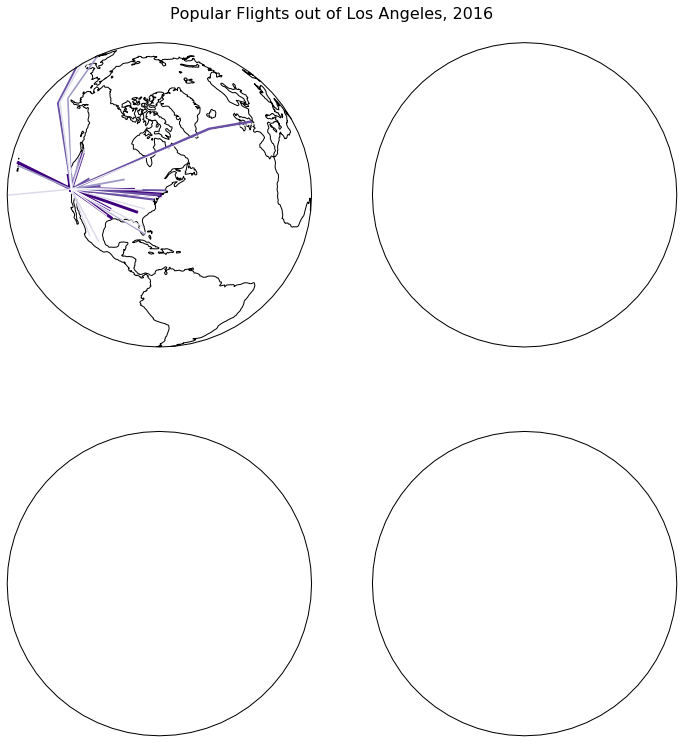

In [77]:
import matplotlib.pyplot as plt
import geoplot.crs as gcrs
import geoplot as gplt
%matplotlib inline

f, axarr = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={
    'projection': gcrs.Orthographic(central_latitude=40.7128, central_longitude=-74.0059)
})
plt.suptitle('Popular Flights out of Los Angeles, 2016', fontsize=16)
plt.subplots_adjust(top=0.95)

ax = gplt.sankey(la_flights, start='Starting Point', end='Ending Point',
                 projection=gcrs.Orthographic(), scale='Passengers', hue='Passengers', cmap='Purples', ax=axarr[0][0])
ax.set_global()
ax.outline_patch.set_visible(True)
ax.coastlines()

In [13]:
la_flights = la_flights.drop(['Origin - Destination', 'Passenger Miles'], axis='columns')

In [18]:
la_flights.head()

Passengers            Destination           Origin  \
3      1863155      San Francisco, CA  Los Angeles, CA   
5      1698805           New York, NY  Los Angeles, CA   
7      1600612            Chicago, IL  Los Angeles, CA   
31     1244407          Las Vegas, NV  Los Angeles, CA   
40     1164625  Dallas/Fort Worth, TX  Los Angeles, CA   

               Starting Point                           Ending Point  
3   POINT (-118.2437 34.0522)        POINT (-122.4194155 37.7749295)  
5   POINT (-118.2437 34.0522)  POINT (-74.00552449999999 40.7134248)  
7   POINT (-118.2437 34.0522)         POINT (-87.6297982 41.8781136)  
31  POINT (-118.2437 34.0522)        POINT (-115.1398296 36.1699412)  
40  POINT (-118.2437 34.0522)         POINT (-97.0403352 32.8998091)

In [22]:
from shapely.geometry import MultiPoint
import geopandas as gpd

la_flights_g = gpd.GeoDataFrame(
    la_flights, 
    geometry=la_flights.apply(lambda df: MultiPoint([df['Starting Point'], df['Ending Point']]), axis='columns')
).drop(['Starting Point', 'Ending Point'], axis='columns')

In [24]:
with open("la-flights.geojson", "w") as f:
    f.write(la_flights_g.to_json())

In [28]:
la_flights = gpd.read_file("la-flights.geojson")

In [33]:
la_flights = la_flights.assign(
    start=la_flights.geometry.map(lambda mp: mp[0]),
    end=la_flights.geometry.map(lambda mp: mp[1])
)

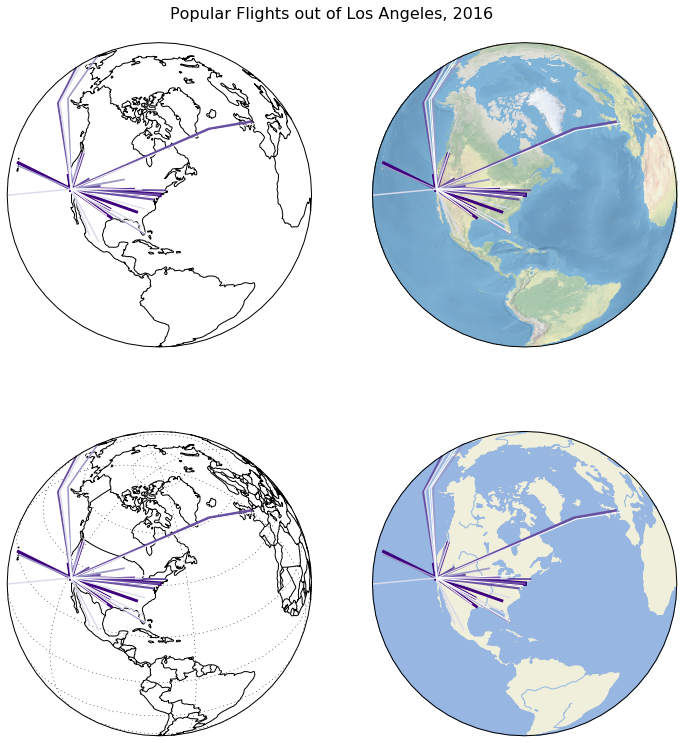

In [41]:
import matplotlib.pyplot as plt
import geoplot.crs as gcrs
import geoplot as gplt
import cartopy
%matplotlib inline

# Plot the data.
f, axarr = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={
    'projection': gcrs.Orthographic(central_latitude=40.7128, central_longitude=-74.0059)
})
plt.suptitle('Popular Flights out of Los Angeles, 2016', fontsize=16)
plt.subplots_adjust(top=0.95)

ax = gplt.sankey(la_flights, start='start', end='end',
                 projection=gcrs.Orthographic(), scale='Passengers', hue='Passengers', cmap='Purples', ax=axarr[0][0])
ax.set_global()
ax.outline_patch.set_visible(True)
ax.coastlines()

ax = gplt.sankey(la_flights, start='start', end='end',
                 projection=gcrs.Orthographic(), scale='Passengers', hue='Passengers', cmap='Purples', ax=axarr[0][1])
ax.set_global()
ax.outline_patch.set_visible(True)
ax.stock_img()

ax = gplt.sankey(la_flights, start='start', end='end',
                 projection=gcrs.Orthographic(), scale='Passengers', hue='Passengers', cmap='Purples', ax=axarr[1][0])
ax.set_global()
ax.outline_patch.set_visible(True)
ax.gridlines()
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)

ax = gplt.sankey(la_flights, start='start', end='end',
                 projection=gcrs.Orthographic(), scale='Passengers', hue='Passengers', cmap='Purples', ax=axarr[1][1])
ax.set_global()
ax.outline_patch.set_visible(True)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.RIVERS)

In [42]:
%ls

boston-airbnb.geojson               nyc-collision-factors.geojson
boston-zip-codes.geojson            nyc-fatal-collisions.geojson
build.ipynb                         nyc-injurious-collisions.geojson
contiguous-usa.geojson              nyc-parking-tickets-sample.geojson
dc-roads.geojson                    nyc-police-precincts.geojson
la-flights.geojson                  nyc-traffic-collisions.geojson
napolean-troop-movements.txt        obesity-by-state.tsv
nyc-boroughs.geojson                usa-cities.geojson
nyc-census-partial.geojson


And now zip this stuff up yourself!

In [13]:
tickets_by_precinct('New York')

Count                                           geometry
Precinct                                                             
1         0.721501  (POLYGON ((-74.0438776157395 40.69018767637665...
5         0.715966  (POLYGON ((-73.98863862848766 40.7229337202636...
6         0.691409  (POLYGON ((-73.99968392160721 40.7385522486597...
7         0.687458  (POLYGON ((-73.97345324119571 40.7189628870822...
9         0.700084  (POLYGON ((-73.97160900246391 40.7267234011698...
10        0.661016  (POLYGON ((-74.00138603698601 40.7628500950018...
13        0.701918  (POLYGON ((-73.98155997085217 40.7438818833470...
14        0.668153  (POLYGON ((-73.97464798076284 40.7533671226278...
17        0.671751  (POLYGON ((-73.96421230395677 40.7466043184766...
18        0.646226  (POLYGON ((-73.99393666655916 40.7731798458359...
19        0.773567  (POLYGON ((-73.94471650134327 40.7697865052794...
20        0.733821  (POLYGON ((-73.96933573385066 40.7852932795572...
22        0.807496  (POLYGON ((-73.94923186072994 40.7968730719466...
23        0.762216  (POLYGON ((-73.93224093714262 40.7896948816873...
24        0.756472  (POLYGON ((-73.95964685423152 40.8011564232564...
25        0.764643  (POLYGON ((-73.93804640603439 40.7808295442755...
26        0.712666  (POLYGON ((-73.94607828740384 40.8212632160622...
28        0.715756  (POLYGON ((-73.94131742369481 40.8077133463810...
30        0.724591  (POLYGON ((-73.94017085151192 40.8303844564390...
32        0.719099  (POLYGON ((-73.93444684733436 40.8359943485225...
33        0.738074  (POLYGON ((-73.9292876130438 40.84585098714959...
34        0.730305  (POLYGON ((-73.9292876130438 40.84585098714959...
40        0.742809  (POLYGON ((-73.90222284765609 40.8049481131900...
41        0.681283  (POLYGON ((-73.89833036270556 40.8024128209400...
42        0.747542  (POLYGON ((-73.88066051304018 40.8374980520049...
43        0.803007  (POLYGON ((-73.8389292661039 40.83442719875428...
44        0.746372  (POLYGON ((-73.90270221290083 40.8445829635918...
45        0.847486  (POLYGON ((-73.78833349834372 40.8346671302619...
46        0.753554  (POLYGON ((-73.89138023291916 40.8617005887647...
47        0.803020  (POLYGON ((-73.79322870948532 40.8828225949056...
...            ...                                                ...
76        0.796977  (POLYGON ((-74.00174362111041 40.6924067497054...
77        0.724776  (POLYGON ((-73.95829216807783 40.6798311334948...
78        0.816552  (POLYGON ((-73.96753196765664 40.6817687836175...
79        0.742352  (POLYGON ((-73.9385685484871 40.69884813554975...
81        0.693310  (POLYGON ((-73.91668638370811 40.6803713787894...
83        0.690969  (POLYGON ((-73.89658573270863 40.6823622732361...
84        0.782875  (POLYGON ((-73.97902894510879 40.7059481267708...
88        0.761379  (POLYGON ((-73.97892920137532 40.7059315898792...
90        0.784934  (POLYGON ((-73.92425716278299 40.7141194555085...
94        0.745004  (POLYGON ((-73.92467622369145 40.7198856964859...
100       0.854254  (POLYGON ((-73.83668274106707 40.5949466970158...
101       0.832371  (POLYGON ((-73.76669139771178 40.6142546554500...
102       0.844515  (POLYGON ((-73.81709738756589 40.7040298010850...
103       0.838700  (POLYGON ((-73.75121246970107 40.7073065795754...
104       0.844162  (POLYGON ((-73.88770199270428 40.7342913227585...
105       0.837314  (POLYGON ((-73.74629861901801 40.6364387994793...
106       0.868447  (POLYGON ((-73.82639242910476 40.6483243486165...
107       0.870886  (POLYGON ((-73.756697712923 40.72622871055659,...
108       0.820007  (POLYGON ((-73.96095347592636 40.7497692856769...
109       0.860685  (POLYGON ((-73.77060974520977 40.782079793942,...
110       0.830236  (POLYGON ((-73.83591564941987 40.7434308933934...
111       0.918486  (POLYGON ((-73.71351828238181 40.7598377308340...
112       0.882263  (POLYGON ((-73.83289066481898 40.7279498603024...
113       0.858247  (POLYGON ((-73.78478547486449 40.6179807218354...
114       0.836704  (PO

In [21]:
tickets.set_index('id').head(3)

ct                                           geometry        nj  \
id                                                                          
1   0.013624  (POLYGON ((-74.0438776157395 40.69018767637665...  0.166860   
5   0.016907  (POLYGON ((-73.98863862848766 40.7229337202636...  0.131073   
6   0.023142  (POLYGON ((-73.99968392160721 40.7385522486597...  0.167719   

          ny        pa  
id                      
1   0.721501  0.016483  
5   0.715966  0.023739  
6   0.691409  0.022594

In [28]:
# Load the data.
precincts = gplt.datasets.load('nyc-police-precincts')
tickets = gplt.datasets.load('nyc-parking-tickets-sample')
boroughs = gplt.datasets.load('nyc-boroughs')

# This function is a reusable wrapper for plotting the data.
def plot_state_to_ax(state, ax):
    gplt.choropleth(tickets.set_index('id').loc[:, [state, 'geometry']], 
                    hue=state,
                    projection=gcrs.AlbersEqualArea(), cmap='Blues',
                    linewidth=0.0, ax=ax)
    gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), edgecolor='black', linewidth=0.5, ax=ax)

# Finally, plot the data.
f, axarr = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={
    'projection': gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059)
})


plt.suptitle('Parking Tickets Issued to State by Precinct, 2016', fontsize=16)
plt.subplots_adjust(top=0.95)

plot_state_to_ax('ny', axarr[0][0])
axarr[0][0].set_title('New York (n=6679268)')

plot_state_to_ax('nj', axarr[0][1])
axarr[0][1].set_title('New Jersey (n=854647)')

plot_state_to_ax('pa', axarr[1][0])
axarr[1][0].set_title('Pennsylvania (n=215065)')

plot_state_to_ax('ct', axarr[1][1])
axarr[1][1].set_title('Connecticut (n=126661)')

In [96]:
troop_positions = pd.read_fwf('/Users/Honors/Desktop/geoplot-data-old/napoloen/troops.txt', sep='\t')

In [97]:
troop_positions = gpd.GeoDataFrame(data=troop_positions,
                                   geometry=troop_positions\
                                       .apply(lambda srs: Point(srs['long'], srs['lat']),
                                              axis='columns'))

subsrs = []
for a, b in zip(range(len(troop_positions) - 1), range(1, len(troop_positions))):
    srs = troop_positions.iloc[b]
    srs = srs.rename({'geometry': 'from'})
    srs['to'] = troop_positions.iloc[a].geometry
    subsrs.append(srs)
troop_movements = pd.concat(subsrs, axis=1).T
troop_movements = troop_movements[['survivors', 'direction', 'group', 'from', 'to']]
troop_movements['direction'] = troop_movements.direction.map(lambda d: 0 if d == 'A' else 1)

In [98]:
troop_movements.head()

survivors  direction group               from                 to
1    340000          0     1    POINT (24.5 55)    POINT (24 54.9)
2    340000          0     1  POINT (25.5 54.5)    POINT (24.5 55)
3    320000          0     1    POINT (26 54.7)  POINT (25.5 54.5)
4    300000          0     1    POINT (27 54.8)    POINT (26 54.7)
5    280000          0     1    POINT (28 54.9)    POINT (27 54.8)

In [99]:
from shapely.geometry import MultiPoint
troop_movements = gpd.GeoDataFrame(troop_movements,
                 geometry=troop_movements.apply(lambda df: MultiPoint([df['from'], df['to']]), axis='columns'))\
    .drop(['from', 'to'], axis='columns')

In [100]:
troop_movements.survivors = troop_movements.survivors.astype(int)

In [101]:
troop_movements.direction = troop_movements.direction.astype(int)
troop_movements.group = troop_movements.group.astype(int)

In [102]:
with open("/Users/Honors/Desktop/geoplot-data/napoleon-troop-movements.geojson", "w") as f:
    f.write(troop_movements.to_json())

In [103]:
troop_movements['from'] = troop_movements.geometry.map(lambda v: v[0])
troop_movements['to'] = troop_movements.geometry.map(lambda v: v[1])

In [104]:
troop_movements

survivors  direction  group                                geometry  \
1      340000          0      1      (POINT (24.5 55), POINT (24 54.9))   
2      340000          0      1    (POINT (25.5 54.5), POINT (24.5 55))   
3      320000          0      1    (POINT (26 54.7), POINT (25.5 54.5))   
4      300000          0      1      (POINT (27 54.8), POINT (26 54.7))   
5      280000          0      1      (POINT (28 54.9), POINT (27 54.8))   
6      240000          0      1      (POINT (28.5 55), POINT (28 54.9))   
7      210000          0      1      (POINT (29 55.1), POINT (28.5 55))   
8      180000          0      1      (POINT (30 55.2), POINT (29 55.1))   
9      175000          0      1    (POINT (30.3 55.3), POINT (30 55.2))   
10     145000          0      1    (POINT (32 54.8), POINT (30.3 55.3))   
11     140000          0      1    (POINT (33.2 54.9), POINT (32 54.8))   
12     127100          0      1  (POINT (34.4 55.5), POINT (33.2 54.9))   
13     100000          0      1  (POINT (35.5 55.4), POINT (34.4 55.5))   
14     100000          0      1    (POINT (36 55.5), POINT (35.5 55.4))   
15     100000          0      1    (POINT (37.6 55.8), POINT (36 55.5))   
16     100000          1      1  (POINT (37.7 55.7), POINT (37.6 55.8))   
17      98000          1      1  (POINT (37.5 55.7), POINT (37.7 55.7))   
18      97000          1      1      (POINT (37 55), POINT (37.5 55.7))   
19      96000          1      1        (POINT (36.8 55), POINT (37 55))   
20      87000          1      1    (POINT (35.4 55.3), POINT (36.8 55))   
21      55000          1      1  (POINT (34.3 55.2), POINT (35.4 55.3))   
22      37000          1      1  (POINT (33.3 54.8), POINT (34.3 55.2))   
23      24000          1      1    (POINT (32 54.6), POINT (33.3 54.8))   
24      20000          1      1    (POINT (30.4 54.4), POINT (32 54.6))   
25      20000          1      1  (POINT (29.2 54.3), POINT (30.4 54.4))   
26      20000          1      1  (POINT (28.5 54.2), POINT (29.2 54.3))   
27      20000          1      1  (POINT (28.3 54.3), POINT (28.5 54.2))   
28      20000          1      1  (POINT (27.5 54.5), POINT (28.3 54.3))   
29      12000          1      1  (POINT (26.8 54.3), POINT (27.5 54.5))   
30      14000          1      1  (POINT (26.4 54.4), POINT (26.8 54.3))   
31       8000          1      1    (POINT (25 54.4), POINT (26.4 54.4))   
32       4000          1      1    (POINT (24.4 54.4), POINT (25 54.4))   
33       4000          1      1  (POINT (24.2 54.4), POINT (24.4 54.4))   
34       4000          1      1  (POINT (24.1 54.4), POINT (24.2 54.4))   
35      60000          0      2    (POINT (24 55.1), POINT (24.1 54.4))   
36      60000          0      2    (POINT (24.5 55.2), POINT (24 55.1))   
37      60000          0      2  (POINT (25.5 54.7), POINT (24.5 55.2))   
38      40000          0      2  (POINT (26.6 55.7), POINT (25.5 54.7))   
39      33000          0      2  (POINT (27.4 55.6), POINT (26.6 55.7))   
40      33000          0      2  (POINT (28.7 55.5), POINT (27.4 55.6))   
41      33000          1      2  (POINT (28.7 55.5), POINT (28.7 55.5))   
42      30000          1      2  (POINT (29.2 54.2), POINT (28.7 55.5))   
43      30000          1      2  (POINT (28.5 54.1), POINT (29.2 54.2))   
44      28000          1      2  (POINT (28.3 54.2), POINT (28.5 54.1))   
45      22000          0      3    (POINT (24 55.2), POINT (28.3 54.2))   
46      22000          0      3    (POINT (24.5 55.3), POINT (24 55.2))   
47       6000          0      3  (POINT (24.6 55.8), POINT (24.5 55.3))   
48       6000          1      3  (POINT (24.6 55.8), POINT (24.6 55.8))   
49       6000          1      3  (POINT (24.2 54.4), POINT (24.6 55.8))   
50       6000          1      3  (POINT (24.1 54.4), POINT (24.2 54.4))   

                 from                 to  
1     POINT (24.5 55)    POINT (24 54.9)  
2   POINT (25.5 54.5)    POINT (24.5 55)  
3     POINT (26 54.7)  POINT (25.5 54.5)  
4     

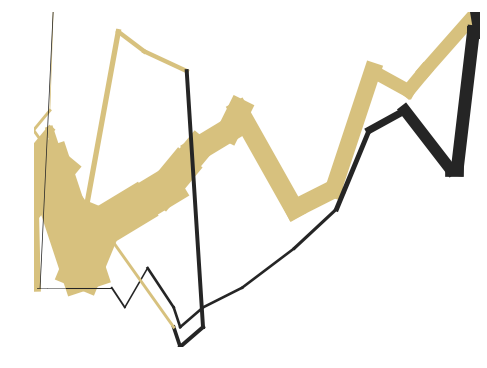

In [105]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(215/255, 193/255, 126/255), (37/255, 37/255, 37/255)]
cm = LinearSegmentedColormap.from_list('minard', colors)

troop_movements['from'] = troop_movements.geometry.map(lambda v: v[0])
troop_movements['to'] = troop_movements.geometry.map(lambda v: v[1])

gplt.sankey(troop_movements, start='from', end='to',
            scale='survivors', limits=(0.5, 45),
            hue='direction', categorical=True, cmap=cm)

In [ ]:
# !del "/Users/Honors/Desktop/geoplot-data/napolean-troop-movements.txt"